In [27]:
from idt_algo import IDT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
gaze = pd.read_csv("C:/Users/s224182/Desktop/Fagpakkeprojekt-Eyes-Modelling/data/gaze_data4.csv")

In [112]:
t = gaze['device_time_stamp']
start = t[0]
for i in range(len(t)):
    t[i] = (t[i] - start)/467000
t

C:\Users\s224182\AppData\Local\Temp\ipykernel_3816\2422198582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[i] = (t[i] - start)/467000
C:\Users\s224182\AppData\Local\Temp\ipykernel_3816\2422198582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[i] = (t[i] - start)/467000
C:\Users\s224182\AppData\Local\Temp\ipykernel_3816\2422198582.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.023775160599571736' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  t[i] = (t[i] - start)/467000


0        0.000000
1        0.023775
2        0.047550
3        0.071325
4        0.095101
          ...    
2940    69.899758
2941    69.923533
2942    69.947308
2943    69.971084
2944    69.994861
Name: device_time_stamp, Length: 2945, dtype: float64

In [118]:
left_x = gaze['left_gaze_origin_in_user_x']
left_y = gaze['left_gaze_origin_in_user_y']
right_x = gaze['right_gaze_origin_in_user_x']
right_y = gaze['right_gaze_origin_in_user_y']

eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y})
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,2.482553,-65.346825,-113.548088,-111.480347
1,0.023775,2.441436,-65.398399,-113.564064,-111.507744
2,0.047550,2.404814,-65.434601,-113.593468,-111.527924
3,0.071325,2.175593,-65.628860,-113.704956,-111.662704
4,0.095101,2.070071,-65.752541,-113.778709,-111.739716
...,...,...,...,...,...
2940,69.899758,8.855115,-59.161289,-114.996246,-110.382484
2941,69.923533,8.810511,-59.183624,-114.987473,-110.389549
2942,69.947308,8.772588,-59.211838,-114.975487,-110.389427
2943,69.971084,8.629989,-59.361855,-114.966225,-110.407593


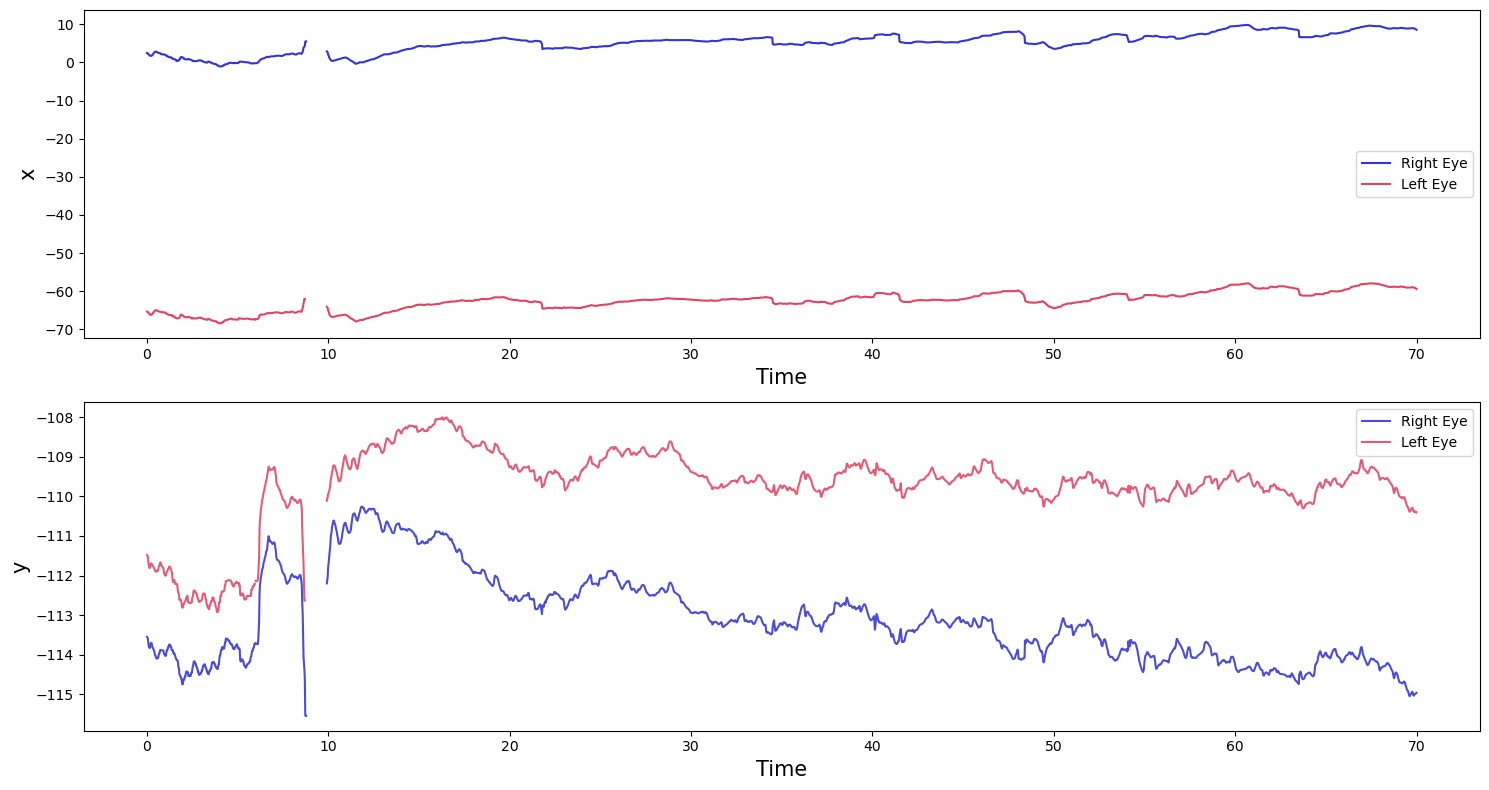

In [120]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IDT(t, x, y, threshold=2, window_size=20)
classifier.process()
classifier.plot()